[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Speech-Interaction-Technology-Aalto-U/itsp/HEAD?labpath=Representations%2FSpectrogram_and_the_STFT.ipynb)

(stft)=
# Spectrogram and the STFT

We have intuitive notion of what a high or low pitch means. Pitch refers
to our perception of the frequency of a tonal sound. The
[Fourier *spectrum*](https://en.wikipedia.org/wiki/Fourier_transform) of
a signal reveals such frequency content. This makes the spectrum an
intuitively pleasing domain to work in, because we can visually examine
signals. 

In practice, we work with discrete-time signals, such that the
corresponding time-frequency transform is the [discrete Fourier
transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). It
maps a length $N$ signal $x_{n}$ into a complex valued frequency
domain representation $X_{k}$ of *N* coefficients as

$$ X_k = \sum_{n=0}^{N-1}x_n e^{-i2\pi\frac{kn}N}. $$

For real-valued inputs, positive and negative frequency components are
complex conjugates of each other, such that we retain $N$ unique units
of information. However, since spectra are complex-valued vectors, it is
difficult to visualize them as such. A first solution would be to plot
the magnitude spectrum $|X_{k}|$ or power
spectrum $|X_{k}|^2$. Due to large differences in
the range of different frequencies, unfortunately these representations
do not easily show relevant information. 

The log-spectrum  $ 20\log_{10}\|X_k\| $ is the most common
visualization of spectra and it gives the spectrum in decibels. It is
useful because again, it gives a visualization where sounds can be
easily interpreted. 

Since Fourier transforms are covered by basic works in signal
processing, we will here assume that readers are familiar with the basic
properties of these transforms.

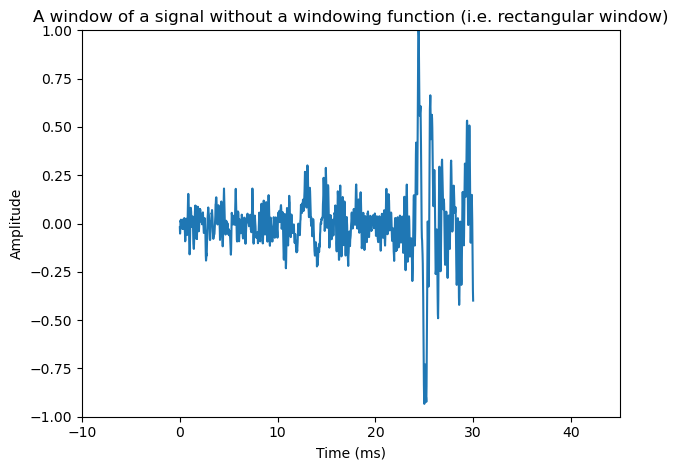

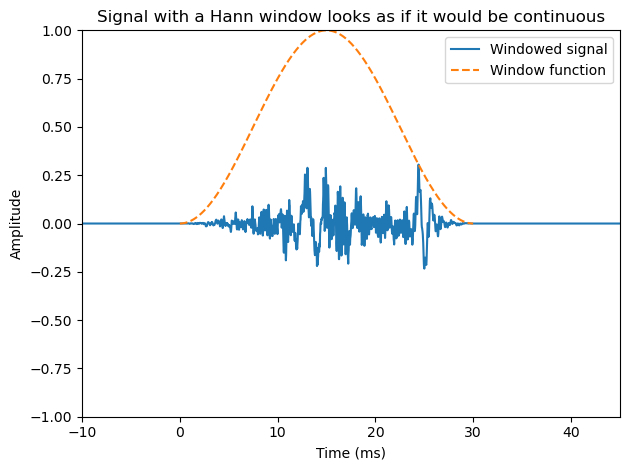

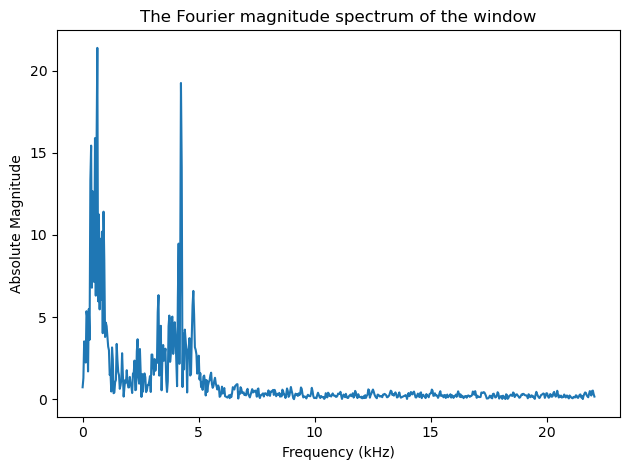

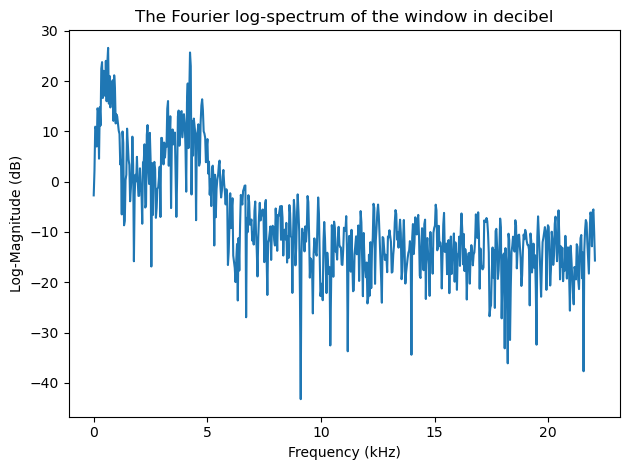

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import scipy.fft


# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)

window_length_ms = 30
window_length = int(np.round(fs*window_length_ms/1000))

n = np.linspace(0.5,window_length-0.5,num=window_length)

# windowing function
windowing_fn = np.sin(np.pi*n/window_length)**2 # sine-window


windowpos = np.random.randint(int((len(data)-window_length)))

datawin = data[windowpos:(windowpos+window_length)]
datawin = datawin/np.max(np.abs(datawin)) # normalize

spectrum = scipy.fft.rfft(datawin*windowing_fn)
f = np.linspace(0.,fs/2,num=len(spectrum))


plt.plot(n*1000/fs,datawin)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('A window of a signal without a windowing function (i.e. rectangular window)')
plt.axis([-10.,45.,-1.,1.])
plt.tight_layout()
plt.show()

#nx = np.concatenate(([-1000,0.],n,[window_length,window_length+1000]))
#datax = np.concatenate(([0.,0.],datawin,[0.,0.]))
#plt.plot(nx*1000/fs,datax)
#plt.xlabel('Time (ms)')
#plt.ylabel('Amplitude')
#plt.title('Signal with a rectangular window looks as if it had a discontinuity at the borders')
#plt.axis([-10.,45.,-1.,1.])
#plt.tight_layout()
#plt.show()

nx = np.concatenate(([-1000,0.],n,[window_length,window_length+1000]))
datax = np.concatenate(([0.,0.],datawin*windowing_fn,[0.,0.]))
plt.plot(nx*1000/fs,datax,label='Windowed signal')
plt.plot(n*1000/fs,windowing_fn,'--',label='Window function')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Signal with a Hann window looks as if it would be continuous')
plt.axis([-10.,45.,-1.,1.])
plt.tight_layout()
plt.show()

plt.plot(f/1000,np.abs(spectrum))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Absolute Magnitude')
plt.title('The Fourier magnitude spectrum of the window')
plt.tight_layout()
plt.show()

plt.plot(f/1000,20.*np.log10(np.abs(spectrum)))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Log-Magnitude (dB)')
plt.title('The Fourier log-spectrum of the window in decibel')
plt.tight_layout()
plt.show()


In [2]:
# interactive example of spectrum
from ipywidgets import *
import IPython.display as ipd
from ipywidgets import interactive
import numpy as np
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)
data = data[:]
data_length = int(len(data))


def update(position_s=0.5*data_length/fs,window_length_ms=32.0):
    ipd.clear_output(wait=True)
    window_length = int(window_length_ms*fs/1000.)
    t = np.arange(0,data_length)/fs
    
    # Hann window
    window_function = np.sin(np.pi*np.arange(.5/window_length,1,1/window_length))**2 
    
    window_position = int(position_s*fs)
    if window_position > data_length-window_length: 
        window_position = data_length-window_length
       
    ix = window_position + np.arange(0,window_length,1)
    window = data[ix]*window_function

    X = scipy.fft.rfft(window.T,n=2*window_length)
    dft_length = len(X)
    f = np.arange(0,dft_length)*(fs/2000)/(dft_length)
    
    fig = plt.figure(figsize=(10, 8))
    #ax = fig.subplots(nrows=1,ncols=1)
    plt.subplot(311)
    plt.plot(t,data)
    plt.plot([position_s, position_s],[np.min(data), np.max(data)],'r--')
    plt.title('Whole signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(312)
    plt.plot(t[ix],data[ix])
    plt.title('Selected window signal at postion (s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(313)
    plt.plot(f,20.*np.log10(np.abs(X)))
    plt.title('Spectrum of window')
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Magnitude (dB)')
    plt.tight_layout()
    plt.show()
    fig.canvas.draw()
        
    


interactive_plot = interactive(update, 
                               #positions_s=widgets.FloatSlider(min=0., max=(data_length-window_length)/fs, value=1., step=0.01,layout=Layout(width='1500px')),
                               position_s=(0., data_length/fs,0.001),
                               window_length_ms=(2.0, 300.0, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '600px'
style = {'description_width':'120px'}
interactive_plot.children[0].layout = Layout(width='760px')
interactive_plot.children[1].layout = Layout(width='760px')
interactive_plot.children[0].style=style
interactive_plot.children[1].style=style
interactive_plot


interactive(children=(FloatSlider(value=1.4048072562358276, description='position_s', layout=Layout(width='760…

Speech signals are however non-stationary signals. If we transform a
spoken sentence to the frequency domain, we obtain a spectrum which is
an average of all phonemes in the sentence, whereas often we would like
to see the spectrum of each individual phoneme separately. 

By splitting the signal into shorter segments, we can focus on signal
properties at a particular point in time. Such segmentation was already
discussed in the *[windowing](Windowing)* section. 

By windowing and taking the discrete Fourier transform (DFT) of each
window, we obtain the [short-time Fourier
transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)
(STFT) of the signal. Specifically, for an input signal
$x_{n}$ and window $w_{n}$, the transform is defined as

$$ STFT\{x_n\}(h,k) = X(h,k) = \sum_{n=0}^{N-1} x_{n+h} w_n
e^{-i2\pi\frac{kn}N}. $$

The STFT is one of the most frequently used tools in speech analysis and
processing. It describes the evolution of frequency components over
time. Like the spectrum itself, one of the benefits of STFTs is that its
parameters have a physical and intuitive interpretation.

A further parallel with a spectrum is that the output of the STFT is
complex-valued, though where the spectrum is a vector, the STFT output
is a matrix. As a consequence, we cannot directly visualize the
complex-valued output. Instead, STFTs are usually visualized using their
log-spectra,  $ 20\log_{10}(X(h,k)). $ Such 2 dimensional
log-spectra can then be visualized with a heat-map known as
a [spectrogram](https://en.wikipedia.org/wiki/Spectrogram).

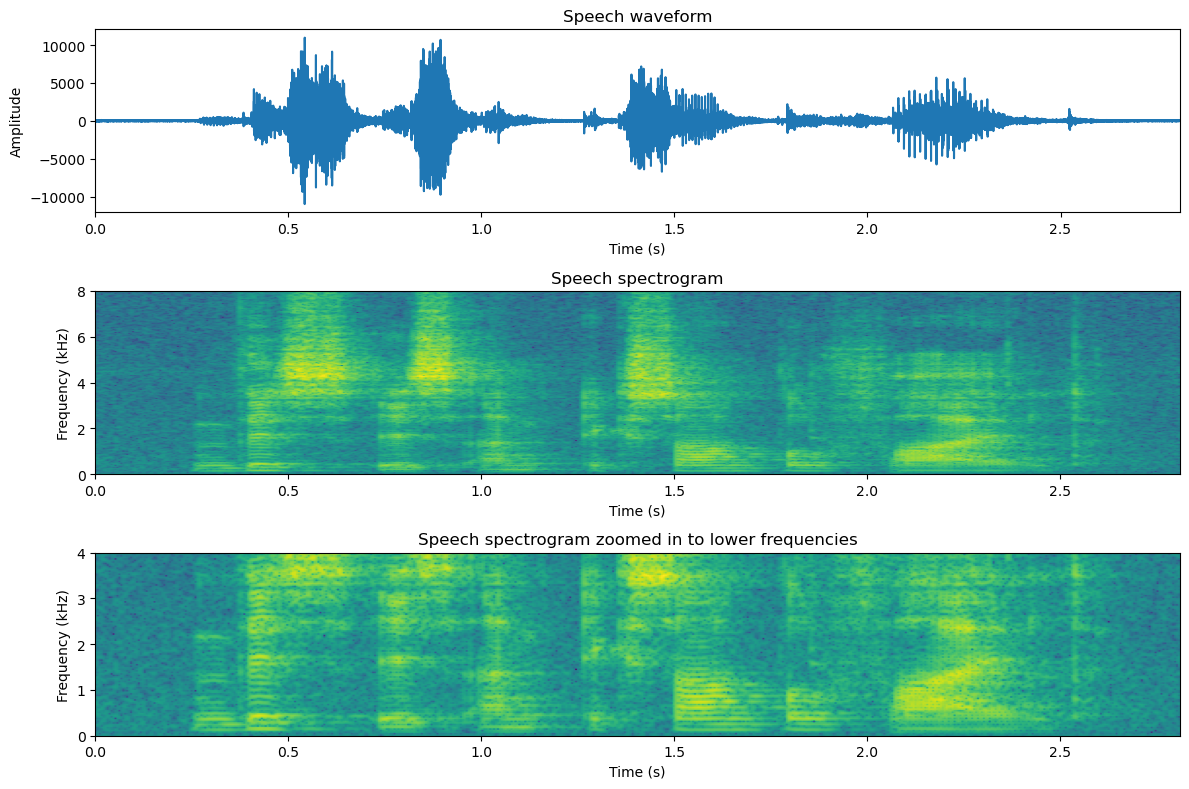

In [10]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
from scipy import signal

# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)

# resample to 16kHz for better visualization
target_fs = 16000
data = scipy.signal.resample(data, len(data)*target_fs//fs)
fs = target_fs

ipd.display(ipd.Audio(data,rate=fs))

# window parameters in milliseconds
window_length_ms = 30
window_step_ms = 5

window_step = int(np.round(fs*window_step_ms/1000))
window_length = int(np.round(fs*window_length_ms/1000))
window_count = int(np.floor((data.shape[0]-window_length)/window_step)+1)

# windowing function
windowing_fn = np.sin(np.pi*np.linspace(0.5,window_length-0.5,num=window_length)/window_length)**2 # Hann-window

spectrogram_matrix = np.zeros([window_length,window_count],dtype=complex)
for window_ix in range(window_count):    
    data_window = np.multiply(windowing_fn,data[window_ix*window_step+np.arange(window_length)])
    spectrogram_matrix[:,window_ix] = np.fft.fft(data_window)
    
fft_length = int((window_length+1)/2)

t = np.arange(0.,len(data),1.)/fs
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(t,data)
plt.xlim([0,t[-1]])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech waveform')
plt.subplot(312)
plt.imshow(20*np.log10(0.2+np.abs(spectrogram_matrix[range(fft_length),:])),origin='lower',aspect='auto',extent=[0.,len(data)/fs,0.,fs/2000])
#plt.xticks(np.arange(0.,len(data)/fs,0.5));
plt.xlabel('Time (s)')
#plt.yticks(np.arange(0,fft_length,fft_length*10000/fs));
plt.ylabel('Frequency (kHz)');
plt.title('Speech spectrogram')
plt.subplot(313)
plt.imshow(20*np.log10(0.2+np.abs(spectrogram_matrix[range(fft_length//2),:])),origin='lower',aspect='auto',extent=[0.,len(data)/fs,0.,fs/4000])
plt.xlabel('Time (s)')
#plt.yticks(np.arange(0,fft_length,fft_length*10000/fs));
plt.ylabel('Frequency (kHz)');
plt.title('Speech spectrogram zoomed in to lower frequencies')
plt.tight_layout()
plt.show()

When looking at speech in a spectrogram, many important features of the
signal can be clearly observed:

-   Horizontal lines in a comb-structure correspond to the fundamental
    frequency. 
-   Vertical lines correspond to abrupt sounds, which are often
    characterized as transients. Typical transients in speech are stop
    consonants. 
-   Areas which have a lot of energy in the high frequencies (appears as
    a lighter colour), correspond to noisy sounds like fricatives.


In [4]:
from ipywidgets import *
import IPython.display as ipd
from ipywidgets import interactive
import numpy as np
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)
data = data[:]
data_length = int(len(data))


def update(window_length_ms=32.0, window_step_ms=16.0):
    ipd.clear_output(wait=True)
    window_length = int(window_length_ms*fs/1000.)
    window_step = int(window_step_ms*fs/1000.)
    window_count = (data_length - window_length)//window_step + 1
    dft_length = (window_length + 1)//2
    
    # sine window
    window_function = np.sin(np.pi*np.arange(.5/window_length,1,1/window_length))**2 
       
    windows = np.zeros([window_length, window_count])
    for k in range(window_count):
        ix = k*window_step + np.arange(0,window_length,1)
        windows[:,k] = data[ix]*window_function

    X = scipy.fft.rfft(windows.T,n=2*window_length)
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.subplots(nrows=1,ncols=1)
    ax.imshow(20.*np.log10(np.abs(X.T)),origin='lower')
    plt.axis('auto')    
    plt.show()
    fig.canvas.draw()
        
    


interactive_plot = interactive(update, window_length_ms=(2.0, 300.0, 0.5), window_step_ms=(1.,50.,0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=32.0, description='window_length_ms', max=300.0, min=2.0, step=0.5), F…

## Interpreting speech spectrograms

As described above, spectrograms (or more accurately log-magnitude-spectrograms) are effective *visualizations* of speech signals. By looking at spectrograms, we can see many of the most important properties of a speech signal, such as the harmonic structure, temporal events and formants. Let us start by studying the spectrogram below. 

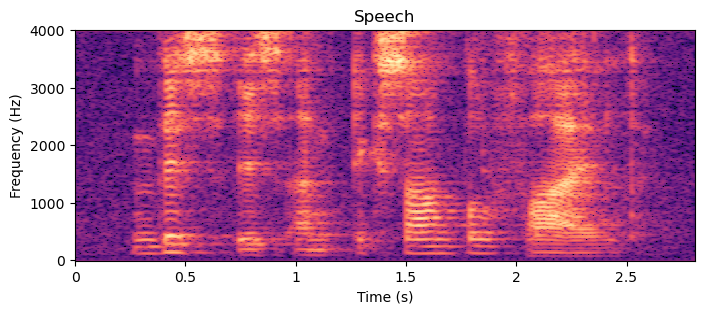

In [5]:
# Initialization
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import scipy.fft
import numpy as np
import librosa
import librosa.display
import helper_functions
import IPython.display as ipd

speechfile = 'sounds/temp.wav'
window_length_ms = 50
window_hop_ms = 3

def pow2dB(x): return 10.*np.log10(np.abs(x)+1e-12)
def dB2pow(x): return 10.**(x/10.)

speech, fs = librosa.load(speechfile)

# resample to 8kHz for better visualization
target_fs = 8000
speech = scipy.signal.resample(speech, len(speech)*target_fs//fs)
fs = target_fs


window_length = window_length_ms*fs//1000
spectrum_length = (window_length+2)//2
window_hop = window_hop_ms*fs//1000
windowing_function = np.sin(np.pi*np.arange(0.5, window_length, 1.)/window_length)

#melfilterbank, melreconstruct = helper_functions.melfilterbank(spectrum_length, fs/2, melbands=35)
filterbank, reconstruct = helper_functions.linearfilterbank(spectrum_length, fs/2, bandwidth_Hz=300)


Speech = librosa.stft(speech, n_fft=window_length, hop_length=window_hop)

frame_cnt = Speech.shape[1]
timebank, timereconstruct = helper_functions.linearfilterbank(frame_cnt, frame_cnt*window_hop_ms, bandwidth_Hz=120)


# envelope
SpeechEnvelope =  np.matmul(reconstruct.T,np.matmul(filterbank.T,np.abs(Speech)**2))**.5
FineFrequencyStructure = Speech/SpeechEnvelope
SpeechEnvelopeTime =  np.matmul(timereconstruct.T,np.matmul(timebank.T,np.abs(SpeechEnvelope.T)**2)).T**.5
FineTimeEnvelope = SpeechEnvelope/SpeechEnvelopeTime
Noise = np.random.randn(SpeechEnvelope.shape[0],SpeechEnvelope.shape[1])
SpeechFrequencyEnvelope = SpeechEnvelope*Noise
SpeechFineTime = FineTimeEnvelope*Noise
SpeechSmoothTime = SpeechEnvelopeTime*Noise

speechfrequencyenvelope = librosa.istft(SpeechFrequencyEnvelope, n_fft=window_length, hop_length=window_hop)
speechfinefrequency = librosa.istft(FineFrequencyStructure, n_fft=window_length, hop_length=window_hop)
speechsmoothtime = librosa.istft(SpeechSmoothTime, n_fft=window_length, hop_length=window_hop)
speechfinetime = librosa.istft(SpeechFineTime, n_fft=window_length, hop_length=window_hop)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,3))
D = librosa.amplitude_to_db(np.abs(Speech), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=fs, hop_length=window_hop)
plt.title('Speech')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

ipd.display(ipd.HTML("Original speech sound"))
ipd.display(ipd.Audio(speech,rate=fs))
#ipd.display(ipd.HTML("<hr>"))

The most fundamental properties of a speech signal are its formants and harmonic structure. Formants correspond to the macro-level shape on the frequency axis, while the harmonic structure is the micro-level structure. That is, if we extra macro-level shape, the frequency-envelope, and remove its effect, we obtain the harmonic structure. 

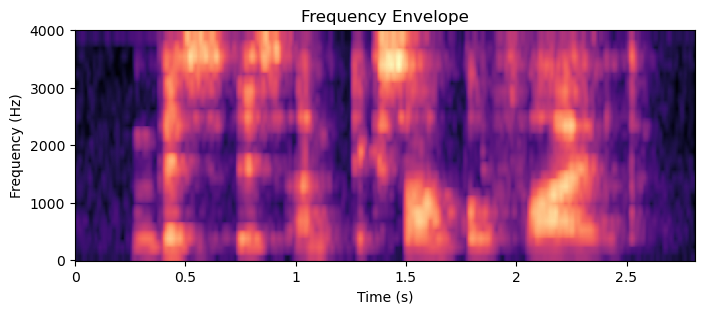

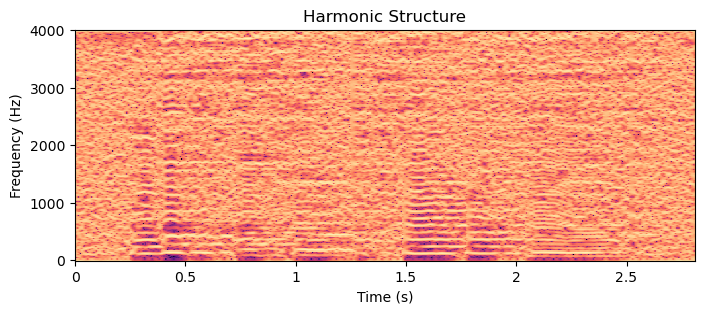

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,3))
D = librosa.amplitude_to_db(np.abs(SpeechEnvelope), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=fs, hop_length=window_hop)
plt.title('Frequency Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

ipd.display(ipd.HTML("White noise shaped by the frequency envelope (i.e. harmonic structure is removed)"))
ipd.display(ipd.Audio(speechfrequencyenvelope,rate=fs))
ipd.display(ipd.HTML("<hr>"))

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,3))
D = librosa.amplitude_to_db(np.abs(FineFrequencyStructure), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=fs, hop_length=window_hop)
plt.title('Harmonic Structure')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

ipd.display(ipd.HTML("Harmonic structure"))
ipd.display(ipd.Audio(speechfinefrequency,rate=fs))
#ipd.display(ipd.HTML("<hr>"))

In the harmonic structure, we see horizontal lines spaced at regular steps. The lowest horizontal line corresponds to the *fundamental frequency $F_0$*. Each subsequent line above it are its harmonics, placed at integer multiples $k$ of the fundamental $kF_0$. In the speech production organs, the fundamental frequency is generated by oscillations in the vocal folds. A smooth sinusoidal oscillation would only have a single frequency, but since the vocal folds collide once in every oscillation, corresponding to a sharp corner in the waveform, which in turn corresponds to a harmonic structure in the frequency. Therefore sharp, bright and tense voiced sounds will have a prominent harmonic structure, while dark and smooth voiced sounds have a low number of visible harmonics. 

In the sound example of the harmonic structure, we can hear saw-tooth like buzzing sounds corresponding to the harmonic structure. Observe also how the linguistic content disappears completely. In contrast, the sound example of the envelope structure, with the harmonic structure replaced by white noise, we can still clearly discern the text content. 

The spectrogram of the envelope structure however still has two distinct components, visible as *rapid and smooth changes over time*. The rapid events correspond to plosives like /p/, /t/ and /k/ sounds, while the slow changes are generated by changes in the vocal tract, which define the vowels. By a similar approach as the above frequency envelope extraction, we can separate such rapid and smooth changes over time.

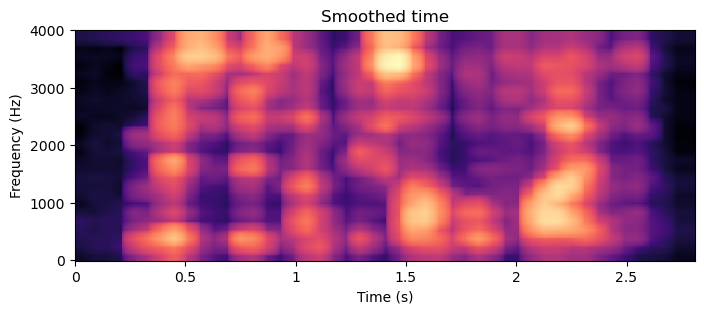

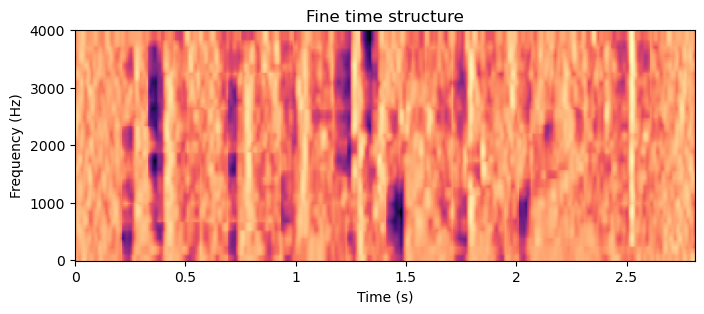

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,3))
D = librosa.amplitude_to_db(np.abs(SpeechEnvelopeTime), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=fs, hop_length=window_hop)
plt.title('Smoothed time')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

ipd.display(ipd.HTML("White noise shaped by smooth time structure"))
ipd.display(ipd.Audio(speechsmoothtime,rate=fs))
ipd.display(ipd.HTML("<hr>"))

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,3))
D = librosa.amplitude_to_db(np.abs(FineTimeEnvelope), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=fs, hop_length=window_hop)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fine time structure')
plt.show()

ipd.display(ipd.HTML("White noise shaped by fine time structure"))
ipd.display(ipd.Audio(speechfinetime,rate=fs))

In the spectrogram image with the smoothed time structure (and smoothed frequency structure), we can see that the vertical lines corresponding to distinct events in time have been removed. They typically correspond to stops and plosives like /t/, /p/, /b/, /g/ and /k/. Correspondingly, in the spectrogram image of the fine time structrure, we see only vertical lines. The bright vertical lines are often preceeded by dark areas (i.e. on the left side). These are stop consonants, where airflow (and thus sound) is completely stopped before the release. The dark patches thus correspond to an absence of sound, the stop and the following bright lines to the release. Note that voiced consonants like /b/ do not necessarily have a stop part, as the voiced sound can continue throughout the phoneme. 

Finally, perhaps most importantly, in the spectrogram of the signal smoothed over time (and frequency), we are left only with the formant structure. Details of the formant structure is described in Section {ref}`content:acoustic-properties`. We are here interested mainly in the range below 3.5 kHz where the two first formants are located, which are the ones which define vowels. In the smooth time spectrogram, we can see a patchy "line" near 300 Hz from 0.2 to 0.9 s, which rises to near 800 Hz near 1s, to continue again near 300 Hz for a while after that. This is the first formant $F_1$, that is, the formant with the lowest frequency. Simulatenously, there is a second patchy line going first near 1800 Hz, then dropping to 1300 Hz and jumping to 2100 Hz. In the spoken sentence, this segment corresponds to the vowels from "This is an ex..", that is, /i/, /i/, /a/, /e/. In other words, by cross-referencing with a formant frequency table for vowels, we can in theory identify the vowels from this spectrogram.

## Further reading

- Section {ref}`content:acoustic-properties`
- [How do I read a spectrogram?](https://home.cc.umanitoba.ca/~robh/howto.html) by [prof. Rob Hagiwara](https://home.cc.umanitoba.ca/~robh/research.html) from U Manitoba.

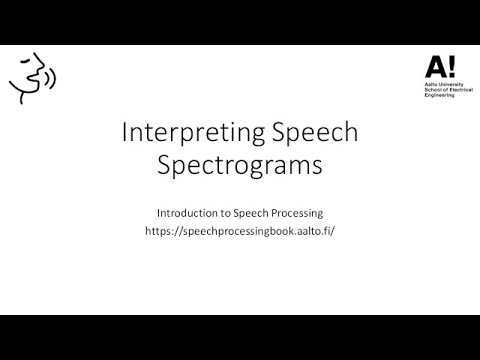

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo("yrPk19sHRMg")